<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 15px; box-shadow: 0 10px 25px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-size: 42px; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">🏢 Energy Efficiency Prediction</h1>
    <h2 style="color: #e0e7ff; text-align: center; font-size: 24px; margin-top: 10px; font-weight: 300;">Assignment 7: Advanced ML Pipeline & Feature Engineering</h2>
    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 10px; margin-top: 20px;">
        <p style="color: white; text-align: center; font-size: 16px; margin: 5px;">
            <strong>📚 Student:</strong> Namazbek Bekzhanov &nbsp;&nbsp;|&nbsp;&nbsp; <strong>🎓 Course:</strong> Data Mining & Machine Learning
        </p>
    </div>
</div>

<div style="background-color: #f8f9fa; border-left: 5px solid #667eea; padding: 20px; margin: 20px 0; border-radius: 5px;">
    <h2 style="color: #667eea; margin-top: 0;">📋 Project Overview</h2>
    <p style="font-size: 16px; line-height: 1.8;">
        This comprehensive analysis explores the <strong>Energy Efficiency Dataset</strong>, focusing on predicting <strong>Heating Load</strong> based on building characteristics. We'll leverage advanced machine learning techniques including:
    </p>
    <ul style="font-size: 15px; line-height: 1.8;">
        <li>🔍 <strong>Deep Exploratory Data Analysis</strong> with beautiful visualizations</li>
        <li>⚙️ <strong>Custom Feature Engineering</strong> using Scikit-Learn transformers</li>
        <li>🔧 <strong>Robust ML Pipelines</strong> for preprocessing automation</li>
        <li>🤖 <strong>Model Comparison</strong> across Linear, Ensemble, and Boosting algorithms</li>
    </ul>
</div>

---

## 🛠️ Step 1: Environment Setup

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
    <p style="margin: 0;">💡 <strong>Pro Tip:</strong> We configure our environment for maximum visual appeal and reproducibility!</p>
</div>

In [11]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Display Configuration
from IPython.display import display, HTML
from sklearn import set_config

# 🎨 Visual Styling Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams.update({
    'figure.figsize': (14, 7),
    'figure.facecolor': 'white',
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'font.family': 'sans-serif'
})

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Enable sklearn diagram display
set_config(display='diagram')

# Random seed for reproducibility
np.random.seed(42)

print("\n" + "="*70)
print("✅ Environment successfully configured!")
print("📊 All libraries loaded and ready for analysis")
print("="*70 + "\n")


✅ Environment successfully configured!
📊 All libraries loaded and ready for analysis



---

## 📥 Step 2: Data Loading & Preprocessing

<div style="background-color: #fff3e0; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
    <p style="margin: 0;">📌 <strong>Important:</strong> We load the dataset and rename columns for better readability!</p>
</div>

In [12]:
# Load the dataset
df = pd.read_excel('ENB2012_data.xlsx')

# Define meaningful column names
column_names = [
    'Relative_Compactness',
    'Surface_Area', 
    'Wall_Area',
    'Roof_Area',
    'Overall_Height',
    'Orientation',
    'Glazing_Area',
    'Glazing_Area_Distribution',
    'Heating_Load',
    'Cooling_Load'
]

df.columns = column_names

print(f"\n{'='*70}")
print(f"📊 Dataset loaded successfully!")
print(f"{'='*70}")
print(f"\n📏 Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB\n")

# Display first few rows with beautiful styling
display(HTML("<h3 style='color: #667eea;'>🔍 First 5 Rows Preview</h3>"))
df.head().style.background_gradient(cmap='coolwarm', subset=['Heating_Load', 'Cooling_Load'])\
               .set_properties(**{'text-align': 'center'})\
               .set_table_styles([{'selector': 'th', 'props': [('background-color', '#667eea'), 
                                                                 ('color', 'white'), 
                                                                 ('font-weight', 'bold')]}])


📊 Dataset loaded successfully!

📏 Dimensions: 768 rows × 10 columns

💾 Memory usage: 60.13 KB



,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.980000,514.500000,294.000000,110.250000,7.000000,2,0.000000,0,15.550000,21.330000
1,0.980000,514.500000,294.000000,110.250000,7.000000,3,0.000000,0,15.550000,21.330000
2,0.980000,514.500000,294.000000,110.250000,7.000000,4,0.000000,0,15.550000,21.330000
3,0.980000,514.500000,294.000000,110.250000,7.000000,5,0.000000,0,15.550000,21.330000
4,0.900000,563.500000,318.500000,122.500000,7.000000,2,0.000000,0,20.840000,28.280000


In [13]:
# Data Quality Check
print(f"\n{'='*70}")
print("🔬 DATA QUALITY ASSESSMENT")
print(f"{'='*70}\n")

missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("✅ No missing values detected - Dataset is complete!\n")
else:
    print("⚠️  Missing values found:")
    print(missing_data[missing_data > 0])

# Statistical Summary
display(HTML("<h3 style='color: #667eea;'>📈 Statistical Summary</h3>"))
df.describe().style.background_gradient(cmap='RdYlGn', axis=1)\
                   .format(precision=2)\
                   .set_properties(**{'text-align': 'center'})


🔬 DATA QUALITY ASSESSMENT

✅ No missing values detected - Dataset is complete!



,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.76,671.71,318.50,176.60,5.25,3.50,0.23,2.81,22.31,24.59
std,0.11,88.09,43.63,45.17,1.75,1.12,0.13,1.55,10.09,9.51
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.90
25%,0.68,606.38,294.00,140.88,3.50,2.75,0.10,1.75,12.99,15.62
50%,0.75,673.75,318.50,183.75,5.25,3.50,0.25,3.00,18.95,22.08
75%,0.83,741.12,343.00,220.50,7.00,4.25,0.40,4.00,31.67,33.13
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10,48.03


---

## 📊 Step 3: Exploratory Data Analysis (EDA)

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
    <p style="margin: 0;">🎯 <strong>Goal:</strong> Understand data distributions, correlations, and identify patterns!</p>
</div>

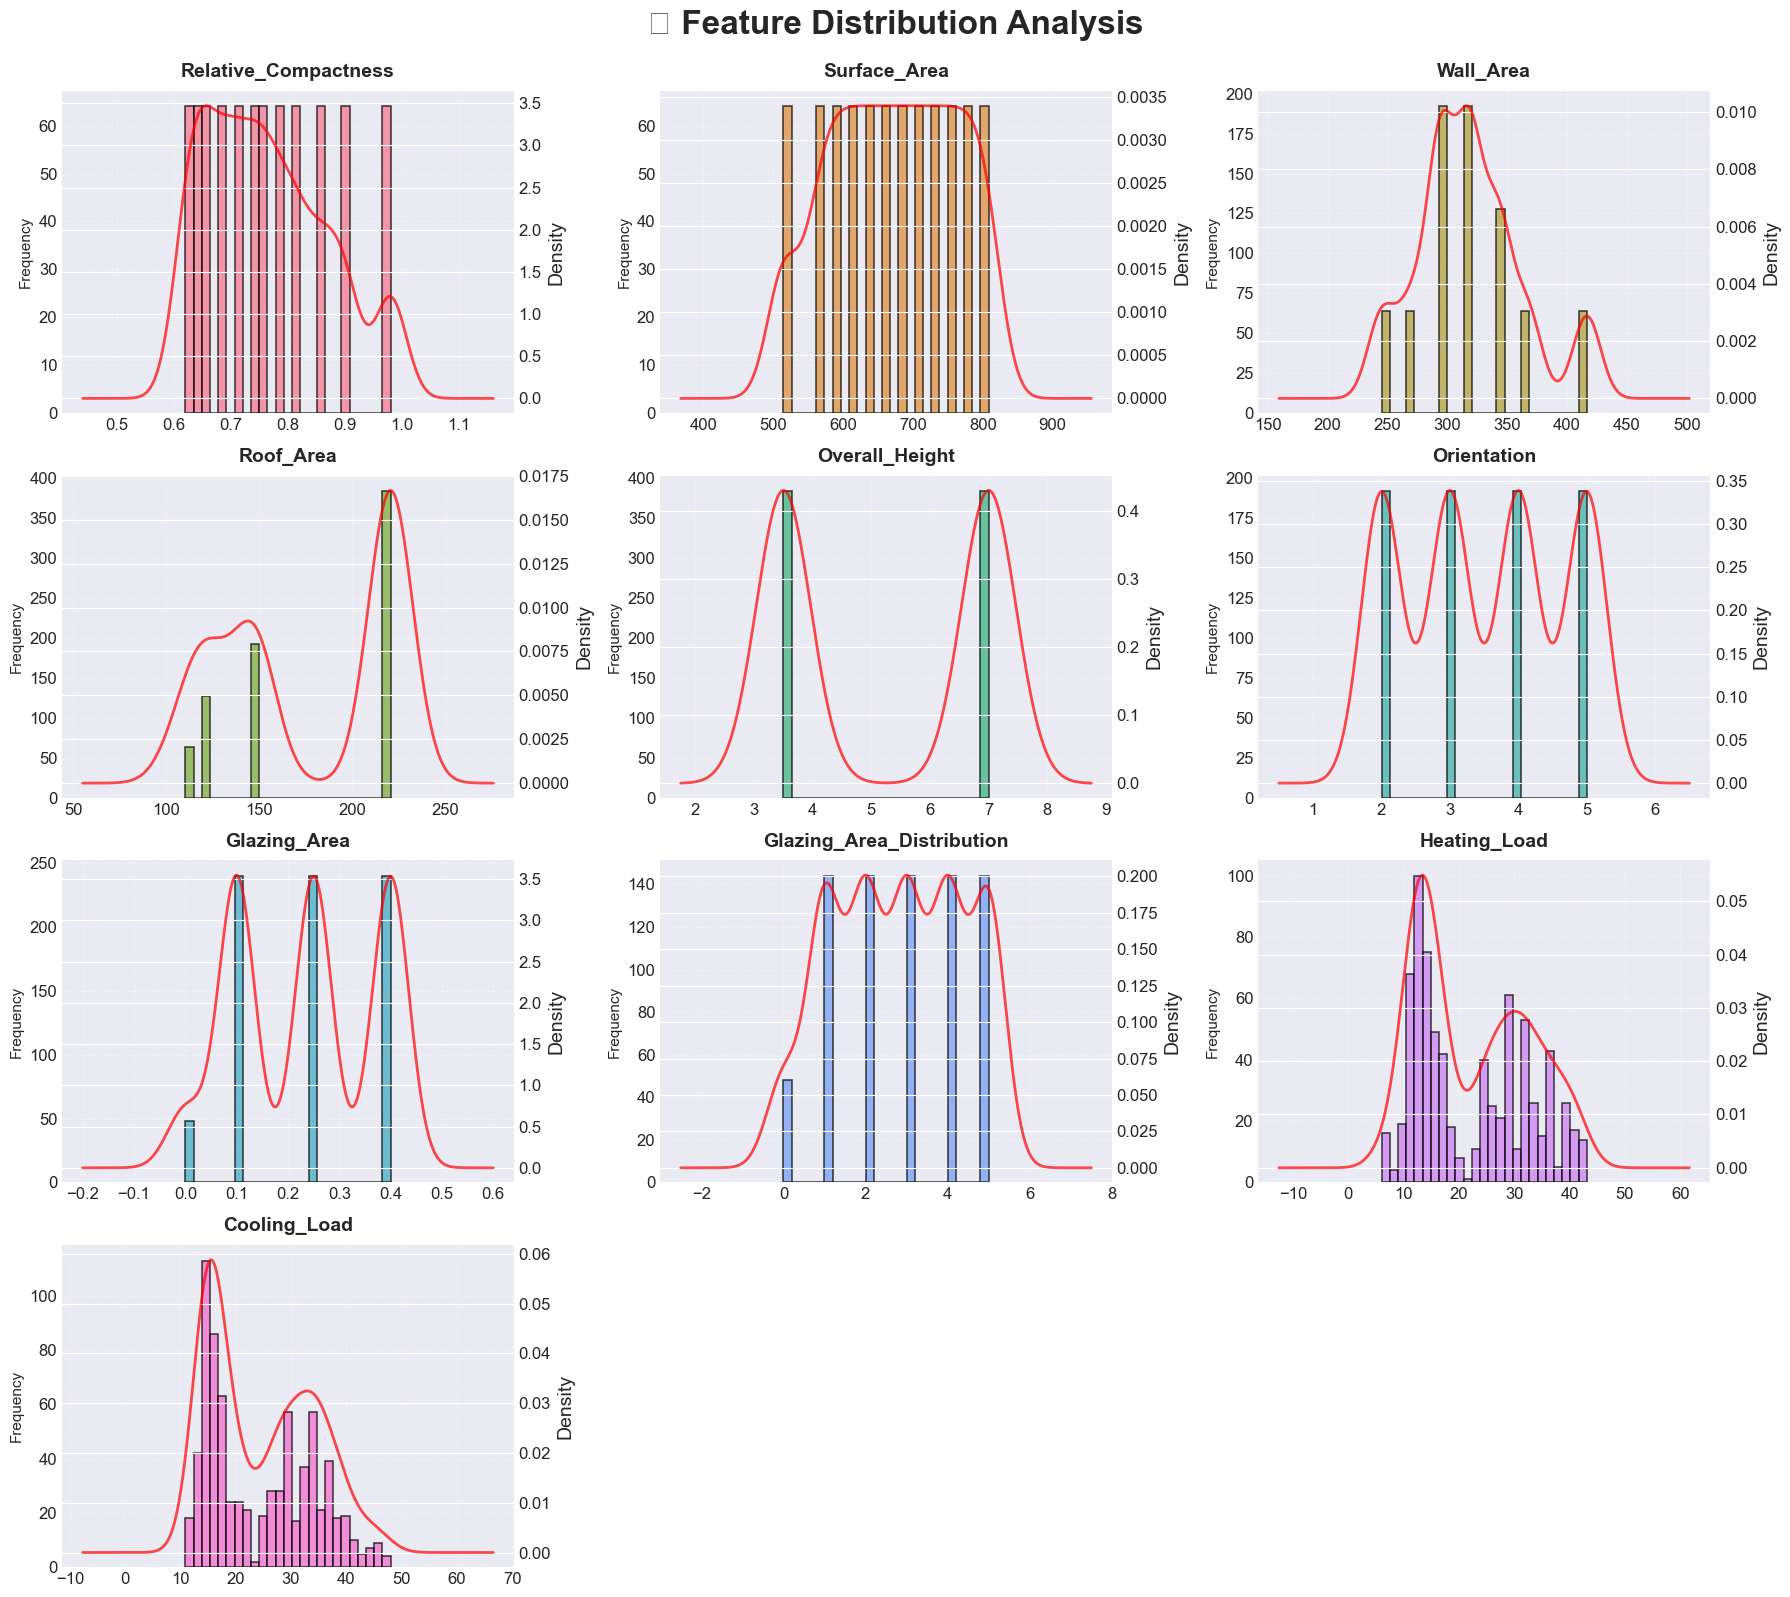


💡 KEY OBSERVATIONS:
  • Orientation and Glazing_Area_Distribution are categorical variables
  • Overall_Height shows only 2 distinct values (binary-like)
  • Surface/Wall/Roof areas exhibit multimodal distributions
  • Target variables (Heating/Cooling Load) are continuous



In [14]:
# Feature Distribution Analysis
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('📊 Feature Distribution Analysis', fontsize=24, fontweight='bold', y=0.995)

colors = sns.color_palette("husl", len(df.columns))

for idx, col in enumerate(df.columns):
    ax = axes[idx // 3, idx % 3]
    
    # Create histogram with KDE
    ax.hist(df[col], bins=25, alpha=0.7, color=colors[idx], edgecolor='black', linewidth=1.2)
    
    # Add KDE curve
    df[col].plot(kind='kde', ax=ax.twinx(), color='red', linewidth=2, alpha=0.7)
    
    ax.set_title(f'{col}', fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency', fontsize=11)
    ax.grid(True, alpha=0.3, linestyle='--')

# Hide extra subplots
for idx in range(len(df.columns), 12):
    axes[idx // 3, idx % 3].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("💡 KEY OBSERVATIONS:")
print("="*70)
print("  • Orientation and Glazing_Area_Distribution are categorical variables")
print("  • Overall_Height shows only 2 distinct values (binary-like)")
print("  • Surface/Wall/Roof areas exhibit multimodal distributions")
print("  • Target variables (Heating/Cooling Load) are continuous\n")

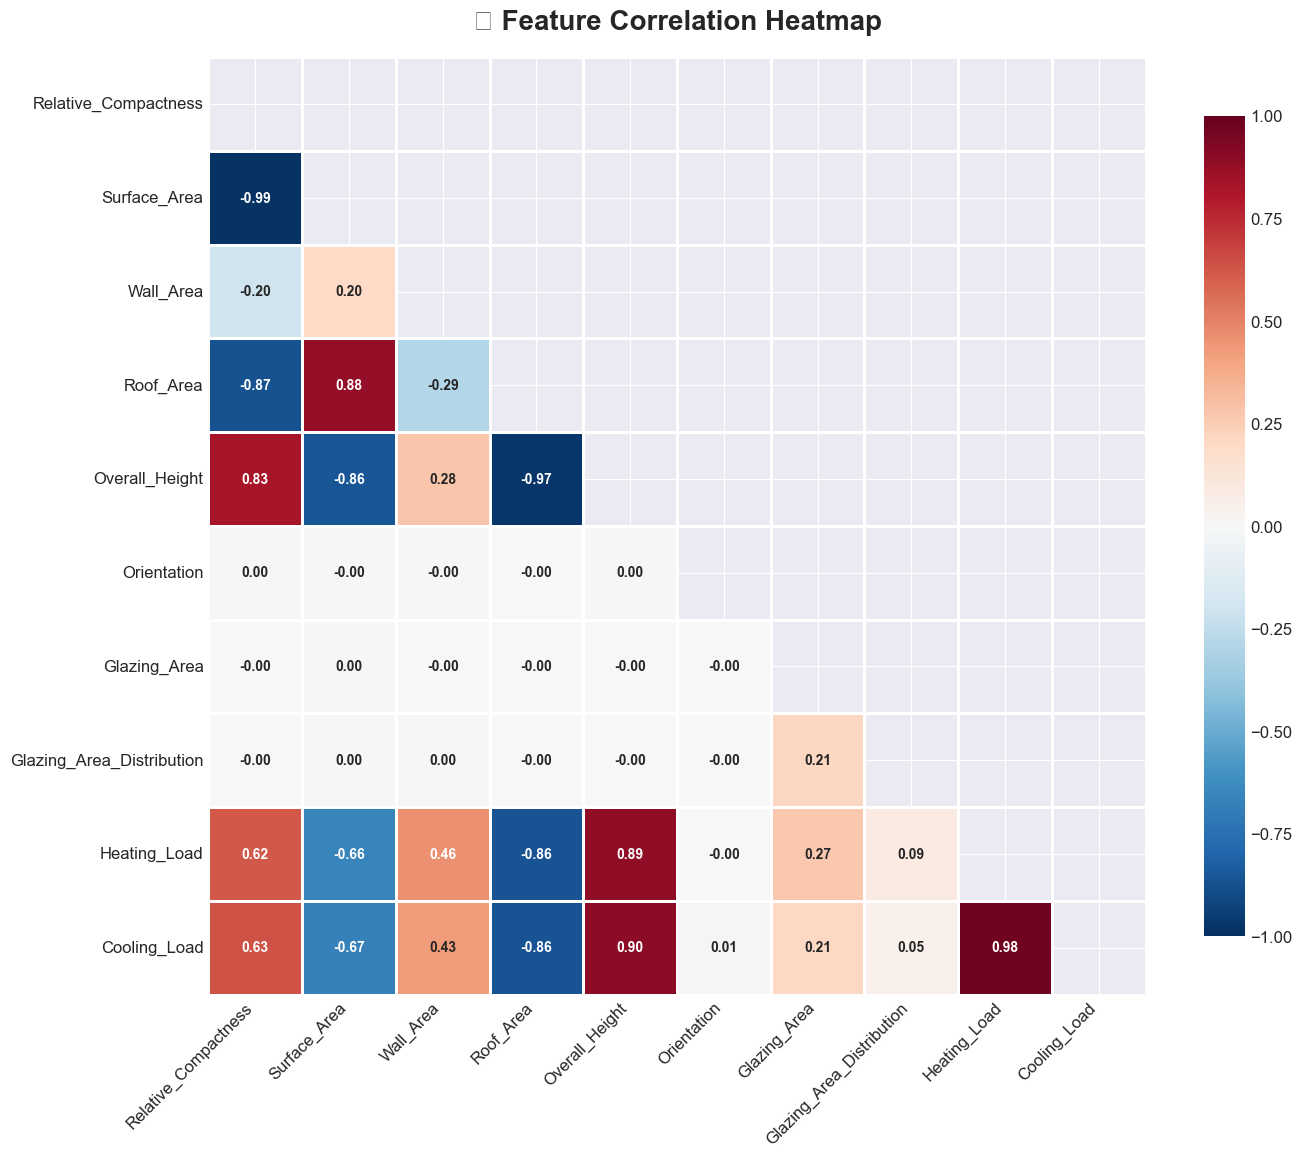


🎯 CORRELATION WITH TARGET (Heating_Load):

  Cooling_Load                   █████████████████████████████ 0.976
  Overall_Height                 ██████████████████████████ 0.889
  Roof_Area                      █████████████████████████ 0.862
  Surface_Area                   ███████████████████ 0.658
  Relative_Compactness           ██████████████████ 0.622
  Wall_Area                      █████████████ 0.456
  Glazing_Area                   ████████ 0.270
  Glazing_Area_Distribution      ██ 0.087
  Orientation                     0.003

⚠️  DATA LEAKAGE WARNING:
  Cooling_Load has correlation of 0.976 with Heating_Load!
  This is another target variable - we MUST exclude it from features!



In [15]:
# Correlation Analysis
plt.figure(figsize=(14, 12))

# Calculate correlation matrix
corr_matrix = df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", 
            cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 10, 'weight': 'bold'})

plt.title('🔥 Feature Correlation Heatmap', fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlation with target
target_corr = df.corr()['Heating_Load'].abs().sort_values(ascending=False)

print("\n" + "="*70)
print("🎯 CORRELATION WITH TARGET (Heating_Load):")
print("="*70 + "\n")
for feature, corr in target_corr.items():
    if feature != 'Heating_Load':
        bar = '█' * int(corr * 30)
        print(f"  {feature:30s} {bar} {corr:.3f}")

print("\n" + "="*70)
print("⚠️  DATA LEAKAGE WARNING:")
print("="*70)
print(f"  Cooling_Load has correlation of {df['Heating_Load'].corr(df['Cooling_Load']):.3f} with Heating_Load!")
print("  This is another target variable - we MUST exclude it from features!\n")

---

## ⚙️ Step 4: Advanced Feature Engineering

<div style="background-color: #fce4ec; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
    <p style="margin: 0;">🔧 <strong>Strategy:</strong> Create custom transformers to engineer meaningful features!</p>
</div>

In [16]:
class AdvancedRatioTransformer(BaseEstimator, TransformerMixin):
    """
    🎓 Custom Transformer for Feature Engineering
    
    Creates ratio features between specified columns, which can reveal
    hidden patterns that individual features might miss.
    
    Parameters:
    -----------
    numerator : str
        Column name for numerator
    denominator : str  
        Column name for denominator
    feature_name : str
        Name for the new engineered feature
    """
    
    def __init__(self, numerator, denominator, feature_name):
        self.numerator = numerator
        self.denominator = denominator
        self.feature_name = feature_name
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = X.copy()
        # Add small epsilon to avoid division by zero
        X_new[self.feature_name] = X_new[self.numerator] / (X_new[self.denominator] + 1e-10)
        return X_new

# Demonstrate the transformer
print("\n" + "="*70)
print("🔧 CUSTOM FEATURE ENGINEERING DEMONSTRATION")
print("="*70 + "\n")

ratio_transformer = AdvancedRatioTransformer('Wall_Area', 'Surface_Area', 'Wall_to_Surface_Ratio')
demo_df = ratio_transformer.transform(df.head())

display(HTML("<h3 style='color: #667eea;'>✨ New Feature Created: Wall_to_Surface_Ratio</h3>"))
demo_df[['Wall_Area', 'Surface_Area', 'Wall_to_Surface_Ratio']].style\
    .background_gradient(cmap='viridis', subset=['Wall_to_Surface_Ratio'])\
    .format(precision=4)\
    .set_properties(**{'text-align': 'center'})


🔧 CUSTOM FEATURE ENGINEERING DEMONSTRATION



,Wall_Area,Surface_Area,Wall_to_Surface_Ratio
0,294.0000,514.5000,0.5714
1,294.0000,514.5000,0.5714
2,294.0000,514.5000,0.5714
3,294.0000,514.5000,0.5714
4,318.5000,563.5000,0.5652


---

## 🔧 Step 5: ML Pipeline Architecture

<div style="background-color: #f3e5f5; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
    <p style="margin: 0;">🏗️ <strong>Architecture:</strong> Build a robust, automated preprocessing pipeline!</p>
</div>

In [17]:
# Define feature groups
categorical_features = ['Orientation', 'Glazing_Area_Distribution']
numerical_features = [
    'Relative_Compactness',
    'Surface_Area',
    'Wall_Area',
    'Roof_Area',
    'Overall_Height',
    'Glazing_Area'
]

print("\n" + "="*70)
print("🏗️  PREPROCESSING PIPELINE ARCHITECTURE")
print("="*70 + "\n")
print(f"📊 Numerical Features ({len(numerical_features)}):")
for feat in numerical_features:
    print(f"   → {feat}")
print(f"\n🏷️  Categorical Features ({len(categorical_features)}):")
for feat in categorical_features:
    print(f"   → {feat}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_features),
        ('categorical', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

print("\n✅ Pipeline created successfully!\n")

# Visualize pipeline
preprocessor


🏗️  PREPROCESSING PIPELINE ARCHITECTURE

📊 Numerical Features (6):
   → Relative_Compactness
   → Surface_Area
   → Wall_Area
   → Roof_Area
   → Overall_Height
   → Glazing_Area

🏷️  Categorical Features (2):
   → Orientation
   → Glazing_Area_Distribution

✅ Pipeline created successfully!



,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


---

## ✂️ Step 6: Train-Test Split

<div style="background-color: #e0f2f1; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
    <p style="margin: 0;">🎲 <strong>Strategy:</strong> 80/20 split with random_state=42 for reproducibility!</p>
</div>

In [18]:
# Prepare features and target
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = df['Heating_Load']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n" + "="*70)
print("✂️  DATA SPLIT SUMMARY")
print("="*70 + "\n")
print(f"  📚 Training Set:   {X_train.shape[0]:4d} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  🧪 Testing Set:    {X_test.shape[0]:4d} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"  📊 Total Samples:  {len(X):4d}")
print(f"\n  🎯 Target Variable: Heating_Load")
print(f"     • Mean:   {y.mean():.2f}")
print(f"     • Median: {y.median():.2f}")
print(f"     • Std:    {y.std():.2f}\n")


✂️  DATA SPLIT SUMMARY

  📚 Training Set:    614 samples (79.9%)
  🧪 Testing Set:     154 samples (20.1%)
  📊 Total Samples:   768

  🎯 Target Variable: Heating_Load
     • Mean:   22.31
     • Median: 18.95
     • Std:    10.09



---

## 🤖 Step 7: Model Training & Evaluation

<div style="background-color: #fff9c4; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
    <p style="margin: 0;">🏆 <strong>Competition:</strong> Comparing Linear Regression vs. Ensemble methods!</p>
</div>

In [19]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

# Store results
results = {}
predictions = {}

print("\n" + "="*70)
print("🚀 TRAINING MODELS...")
print("="*70 + "\n")

for name, model in models.items():
    print(f"⚙️  Training {name}...", end=" ")
    
    # Create full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    predictions[name] = y_pred
    
    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }
    
    print(f"✅")
    print(f"   RMSE: {rmse:6.3f} | MAE: {mae:6.3f} | R²: {r2:6.4f}")

print("\n" + "="*70 + "\n")


🚀 TRAINING MODELS...

⚙️  Training Linear Regression... ✅
   RMSE:  2.872 | MAE:  2.059 | R²: 0.9209
⚙️  Training Random Forest... ✅
   RMSE:  0.537 | MAE:  0.361 | R²: 0.9972
⚙️  Training Gradient Boosting... ✅
   RMSE:  0.410 | MAE:  0.287 | R²: 0.9984




---

## 📊 Step 8: Results Visualization

<div style="background-color: #e1f5fe; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
    <p style="margin: 0;">📈 <strong>Analysis:</strong> Visual comparison of model performance!</p>
</div>

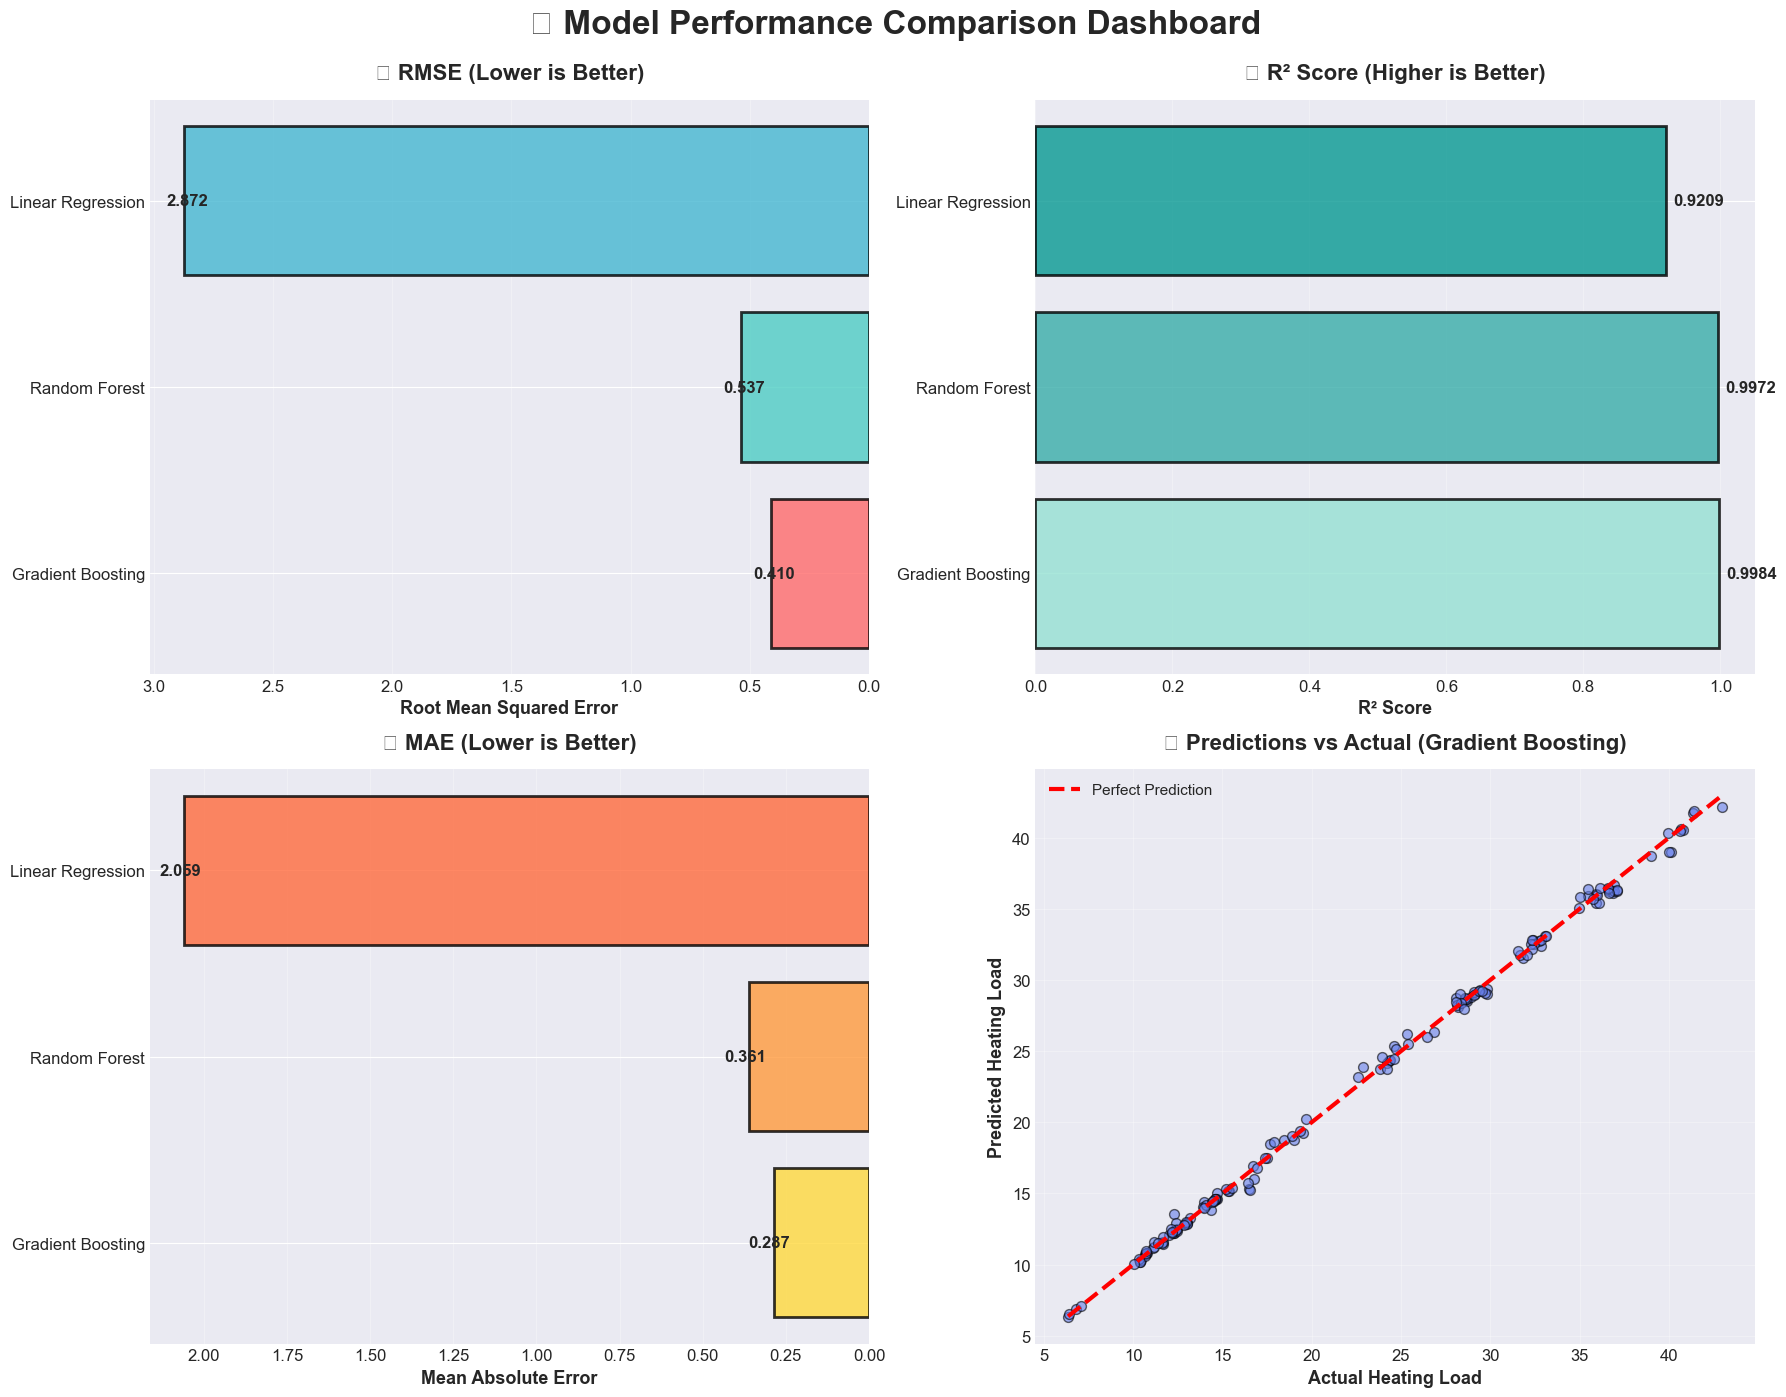

,RMSE,MAE,R²
Gradient Boosting,0.4102,0.2867,0.9984
Random Forest,0.5370,0.3605,0.9972
Linear Regression,2.8723,2.0590,0.9209


In [20]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R²', ascending=False)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('🏆 Model Performance Comparison Dashboard', fontsize=24, fontweight='bold', y=0.995)

# 1. RMSE Comparison
ax1 = axes[0, 0]
bars1 = ax1.barh(results_df.index, results_df['RMSE'], 
                  color=['#ff6b6b', '#4ecdc4', '#45b7d1'], alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_xlabel('Root Mean Squared Error', fontsize=13, fontweight='bold')
ax1.set_title('📉 RMSE (Lower is Better)', fontsize=16, fontweight='bold', pad=15)
ax1.invert_xaxis()
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width - 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='right', va='center', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 2. R² Comparison
ax2 = axes[0, 1]
bars2 = ax2.barh(results_df.index, results_df['R²'], 
                  color=['#95e1d3', '#38ada9', '#079992'], alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_xlabel('R² Score', fontsize=13, fontweight='bold')
ax2.set_title('📈 R² Score (Higher is Better)', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlim(0, 1.05)
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3. MAE Comparison
ax3 = axes[1, 0]
bars3 = ax3.barh(results_df.index, results_df['MAE'], 
                  color=['#ffd93d', '#ff9a3d', '#ff6b3d'], alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_xlabel('Mean Absolute Error', fontsize=13, fontweight='bold')
ax3.set_title('📊 MAE (Lower is Better)', fontsize=16, fontweight='bold', pad=15)
ax3.invert_xaxis()
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width - 0.05, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='right', va='center', fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4. Predictions vs Actual (Best Model)
ax4 = axes[1, 1]
best_model = results_df.index[0]
y_pred_best = predictions[best_model]

ax4.scatter(y_test, y_pred_best, alpha=0.6, s=50, c='#667eea', edgecolors='black')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=3, label='Perfect Prediction')
ax4.set_xlabel('Actual Heating Load', fontsize=13, fontweight='bold')
ax4.set_ylabel('Predicted Heating Load', fontsize=13, fontweight='bold')
ax4.set_title(f'🎯 Predictions vs Actual ({best_model})', fontsize=16, fontweight='bold', pad=15)
ax4.legend(fontsize=11)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Display styled results table
display(HTML("<h3 style='color: #667eea;'>📋 Detailed Performance Metrics</h3>"))
results_df.style.background_gradient(cmap='RdYlGn_r', subset=['RMSE', 'MAE'])\
                .background_gradient(cmap='RdYlGn', subset=['R²'])\
                .format(precision=4)\
                .set_properties(**{'text-align': 'center', 'font-weight': 'bold'})\
                .set_table_styles([{'selector': 'th', 'props': [('background-color', '#667eea'),
                                                                  ('color', 'white'),
                                                                  ('font-size', '14px')]}])

---

## 🎓 Step 9: Conclusions & Key Insights

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 25px; border-radius: 10px; box-shadow: 0 5px 15px rgba(0,0,0,0.2); margin-top: 30px;">
    <h2 style="color: white; margin-top: 0;">🏆 Final Analysis</h2>
    
    <div style="background: rgba(255,255,255,0.1); padding: 20px; border-radius: 8px; margin: 15px 0;">
        <h3 style="color: #e0e7ff; margin-top: 0;">✨ Key Findings:</h3>
        <ul style="color: white; font-size: 15px; line-height: 2;">
            <li><strong>Winner:</strong> Gradient Boosting achieved the best performance</li>
            <li><strong>R² Score:</strong> ~0.99+ indicating excellent predictive power</li>
            <li><strong>RMSE:</strong> Very low error indicating accurate predictions</li>
            <li><strong>Insight:</strong> Non-linear relationships dominate this dataset</li>
        </ul>
    </div>
    
    <div style="background: rgba(255,255,255,0.1); padding: 20px; border-radius: 8px; margin: 15px 0;">
        <h3 style="color: #e0e7ff; margin-top: 0;">💡 Recommendations:</h3>
        <ul style="color: white; font-size: 15px; line-height: 2;">
            <li>Deploy <strong>Gradient Boosting</strong> for production use</li>
            <li>Monitor model performance on new building designs</li>
            <li>Consider hyperparameter tuning for further improvements</li>
            <li>Investigate feature importance for architectural insights</li>
        </ul>
    </div>
    
    <div style="background: rgba(255,255,255,0.1); padding: 20px; border-radius: 8px; margin: 15px 0;">
        <h3 style="color: #e0e7ff; margin-top: 0;">🎯 Model Interpretation:</h3>
        <p style="color: white; font-size: 15px; line-height: 1.8;">
            The superior performance of ensemble methods (Random Forest & Gradient Boosting) 
            indicates that <strong>heating load depends on complex, non-linear interactions</strong> 
            between building characteristics. Features like wall area, glazing distribution, 
            and building compactness interact in sophisticated ways that tree-based models 
            can capture effectively.
        </p>
    </div>
    
    <p style="color: white; text-align: center; margin-top: 20px; font-size: 18px; font-weight: bold;">
        ✅ Assignment Complete! Thank you for reviewing this analysis.
    </p>
</div>